### Post modeling EDA

In [1]:
#Import relevant packages
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read the saved 'estimated' file which is a dataframe containing predicted movie ratings
est = pd.read_csv('estimated')
est.head(2)

,Unnamed: 0,userId,movieId,estimatedrating
0,0,1,1,4.632922
1,1,1,3,4.152233


In [3]:
est.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230078 entries, 0 to 230077
Data columns (total 3 columns):
userId             230078 non-null int64
movieId            230078 non-null int64
estimatedrating    230078 non-null float64
dtypes: float64(1), int64(2)
memory usage: 5.3 MB


In [5]:
est.isna().sum()

userId             0
movieId            0
estimatedrating    0
dtype: int64

In [6]:
est.nunique()

userId                134
movieId              1717
estimatedrating    229844
dtype: int64

In [7]:
act = pd.read_csv('cleaneddata')
act.head(2)

/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,userId,movieId,rating,title,genres,year,Mystery,Drama,IMAX,...,Musical,Children,Romance,Thriller,Horror,War,Fantasy,(no genres listed),Documentary,Crime
0,0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,False,False,False,...,False,True,False,False,False,False,True,False,False,False
1,1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [8]:
act.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100819 entries, 0 to 100818
Data columns (total 26 columns):
userId                100819 non-null int64
movieId               100819 non-null int64
rating                100819 non-null float64
title                 100819 non-null object
genres                100819 non-null object
year                  100819 non-null object
Mystery               100819 non-null bool
Drama                 100819 non-null bool
IMAX                  100819 non-null bool
Animation             100819 non-null bool
Western               100819 non-null bool
Film-Noir             100819 non-null bool
Comedy                100819 non-null bool
Action                100819 non-null bool
Sci-Fi                100819 non-null bool
Adventure             100819 non-null bool
Musical               100819 non-null bool
Children              100819 non-null bool
Romance               100819 non-null bool
Thriller              100819 non-null bool
Horror            

In [10]:
act.isna().sum()

userId                0
movieId               0
rating                0
title                 0
genres                0
year                  0
Mystery               0
Drama                 0
IMAX                  0
Animation             0
Western               0
Film-Noir             0
Comedy                0
Action                0
Sci-Fi                0
Adventure             0
Musical               0
Children              0
Romance               0
Thriller              0
Horror                0
War                   0
Fantasy               0
(no genres listed)    0
Documentary           0
Crime                 0
dtype: int64

In [11]:
act.nunique()

userId                 610
movieId               9712
rating                  10
title                 9707
genres                 951
year                   209
Mystery                  2
Drama                    2
IMAX                     2
Animation                2
Western                  2
Film-Noir                2
Comedy                   2
Action                   2
Sci-Fi                   2
Adventure                2
Musical                  2
Children                 2
Romance                  2
Thriller                 2
Horror                   2
War                      2
Fantasy                  2
(no genres listed)       2
Documentary              2
Crime                    2
dtype: int64

First want to look at EDA differences between the actual user ratings vs the model predicted ratings.

In [12]:
df_inner = act.merge(est, how='inner')

In [13]:
df_inner

,userId,movieId,rating,title,genres,year,Mystery,Drama,IMAX,Animation,...,Children,Romance,Thriller,Horror,War,Fantasy,(no genres listed),Documentary,Crime,estimatedrating
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,False,False,False,True,...,True,False,False,False,False,True,False,False,False,4.632922
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995,False,False,False,False,...,False,True,False,False,False,False,False,False,False,4.152233
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,1995,False,False,False,False,...,False,False,True,False,False,False,False,False,True,4.448988
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995,True,False,False,False,...,False,False,True,False,False,False,False,False,False,4.598402
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995,True,False,False,False,...,False,False,True,False,False,False,False,False,True,4.721696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47227,610,152081,4.0,Zootopia (2016),Action|Adventure|Animation|Children|Comedy,2016,False,False,False,True,...,True,False,False,False,False,False,False,False,False,4.082546
47228,610,158238,5.0,The Nice Guys (2016),Crime|Mystery|Thriller,2016,True,False,False,False,...,False,False,True,False,False,False,False,False,True,4.458478
47229,610,164179,5.0,Arrival (2016),Sci-Fi,2016,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4.097685
47230,610,166528,4.0,Rogue One: A Star Wars Story (2016),Action|Adventure|Fantasy|Sci-Fi,2016,False,False,False,False,...,False,False,False,False,False,True,False,False,False,4.341146


In [14]:
df_inner.groupby('title').mean()['estimatedrating'].sort_values(ascending=False)

title
Ran (1985)                                 4.485306
Yojimbo (1961)                             4.454763
Paths of Glory (1957)                      4.429585
Shawshank Redemption, The (1994)           4.402448
12 Angry Men (1957)                        4.400826
                                             ...   
Problem Child (1990)                       1.857234
Honey, I Blew Up the Kid (1992)            1.851089
Superman IV: The Quest for Peace (1987)    1.759806
Battlefield Earth (2000)                   1.668999
Speed 2: Cruise Control (1997)             1.630999
Name: estimatedrating, Length: 1717, dtype: float64

/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


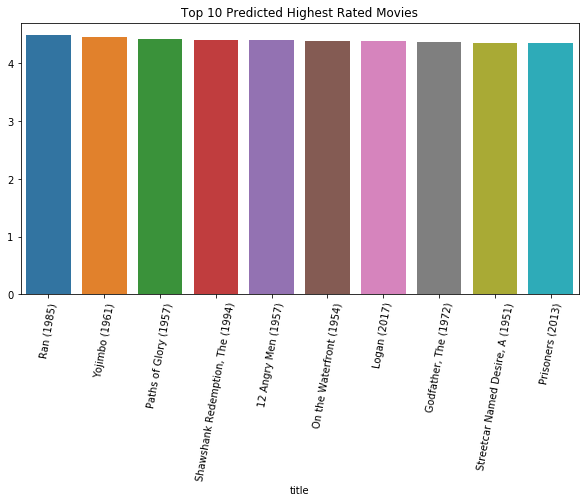

In [15]:
#Plot the top 10 predicted highest rated movies
plt.figure(figsize=(10,5))
topmovies = df_inner.groupby('title').mean()['estimatedrating'].sort_values(ascending=False).head(10)
sns.barplot(topmovies.index, topmovies.values)
plt.title('Top 10 Predicted Highest Rated Movies')
plt.xticks(rotation=80);

In terms of unpersonalized recommendations, we can suggest the top 10 highest rated movies based on model predictions

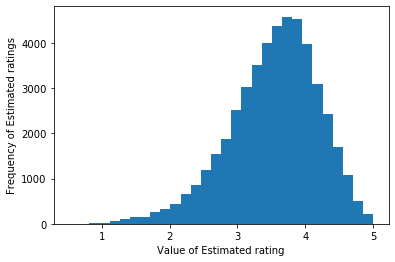

In [16]:
#Plot a histogram of the frequency of certain estimated rating values
plt.hist(df_inner['estimatedrating'],bins=30)
plt.xlabel('Value of Estimated rating')
plt.ylabel('Frequency of Estimated ratings')
plt.show()

Similar to the actual ratings, in that the peak frequency was about 4 as well and less values at the lower end
(1, 2) etc.

In [17]:
df_inner.groupby('title').size().sort_values(ascending=False)

title
Forrest Gump (1994)                                                   119
Matrix, The (1999)                                                    113
Star Wars: Episode IV - A New Hope (1977)                             111
Star Wars: Episode V - The Empire Strikes Back (1980)                 107
Pulp Fiction (1994)                                                   105
                                                                     ... 
Around the World in 80 Days (1956)                                     11
Englishman Who Went Up a Hill But Came Down a Mountain, The (1995)     11
Enter the Dragon (1973)                                                11
Purple Rose of Cairo, The (1985)                                       11
Fantastic Beasts and Where to Find Them (2016)                         11
Length: 1717, dtype: int64

/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


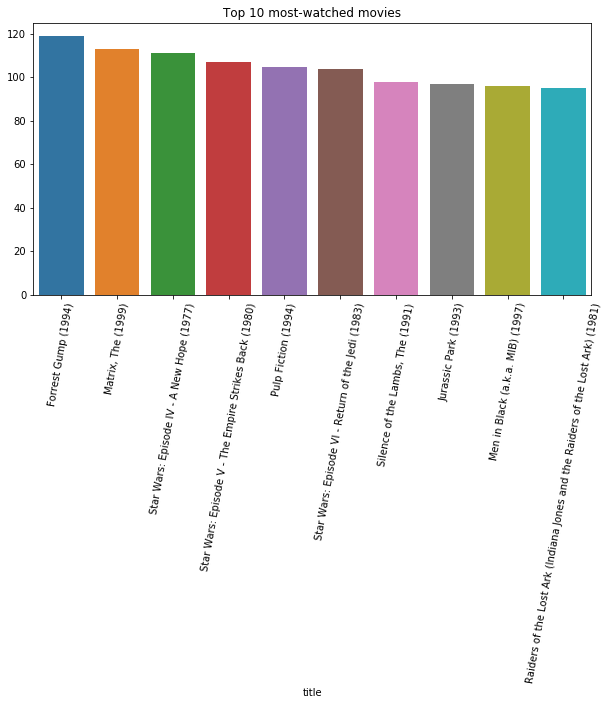

In [18]:
#Plot the top 10 most watched movies
plt.figure(figsize=(10,5))
topmovies = df_inner.groupby('title').size().sort_values(ascending=False).head(10)
sns.barplot(topmovies.index, topmovies.values)
plt.title('Top 10 most-watched movies')
plt.xticks(rotation=80);

In [19]:
df_left = act.merge(est, how='outer')

In [20]:
df_left.isna().sum()

userId                     0
movieId                    0
rating                182846
title                 182846
genres                182846
year                  182846
Mystery               182846
Drama                 182846
IMAX                  182846
Animation             182846
Western               182846
Film-Noir             182846
Comedy                182846
Action                182846
Sci-Fi                182846
Adventure             182846
Musical               182846
Children              182846
Romance               182846
Thriller              182846
Horror                182846
War                   182846
Fantasy               182846
(no genres listed)    182846
Documentary           182846
Crime                 182846
estimatedrating        53587
dtype: int64

In [21]:
df_left.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283665 entries, 0 to 283664
Data columns (total 27 columns):
userId                283665 non-null int64
movieId               283665 non-null int64
rating                100819 non-null float64
title                 100819 non-null object
genres                100819 non-null object
year                  100819 non-null object
Mystery               100819 non-null object
Drama                 100819 non-null object
IMAX                  100819 non-null object
Animation             100819 non-null object
Western               100819 non-null object
Film-Noir             100819 non-null object
Comedy                100819 non-null object
Action                100819 non-null object
Sci-Fi                100819 non-null object
Adventure             100819 non-null object
Musical               100819 non-null object
Children              100819 non-null object
Romance               100819 non-null object
Thriller              100819 non-nu